In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

c:\Users\KYRIAKOS ARISTIDOU\anaconda3\envs\deeplearning\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("A2_data.csv")

In [3]:
# # drop row 79543
df= df.drop(79543, axis=0)

In [4]:
# unique classes
print(df['class'].unique())

labels = df['class']
# drop the class column
df = df.drop(['class','field_ID','plate'], axis=1)



['GALAXY' 'QSO' 'STAR']


In [42]:
df.head()

,alpha,delta,u,g,r,i,z,MJD,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,56064,-0.001584
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,53727,-0.824700
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,54883,-0.418000
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,51783,5.953000
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,56069,0.846000


UMAP

In [5]:
scaler = StandardScaler()
umap = umap.UMAP(n_components=2)
scaled = scaler.fit_transform(df)
transformed = umap.fit_transform(scaled)

In [6]:
transformed_UMAP = pd.DataFrame(transformed, columns=['UMAP1', 'UMAP2'])
key=transformed_UMAP.keys()
transformed_UMAP

,UMAP1,UMAP2
0,12.091504,12.344302
1,6.944759,15.109046
2,10.659245,12.780879
3,-2.724882,3.223615
4,-1.907901,6.929904
...,...,...
99994,11.322503,-4.085731
99995,10.374646,-2.192899
99996,7.340803,7.926017
99997,8.528799,12.662648


Random Forest Classifier

In [7]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split(transformed_UMAP, labels, test_size=0.3, random_state=123, stratify=labels)


Hyperparameter Optimisation

In [ ]:
# clf = AdaBoostClassifier(random_state=123)

In [ ]:
# parameters = {
#     'n_estimators': [5,10,20,30,50,70],
#     'learning_rate': [0.1,0.3,0.5,0.8,1],
#     'algorithm': ['SAMME', 'SAMME.R']
# }
# gr_ada = GridSearchCV(clf, parameters, cv=5, verbose=2, n_jobs=-1)
# gr_ada.fit(x_train, y_train)

In [ ]:
# gr_ada.best_params_

Cross Validation Score

In [17]:
# from sklearn.model_selection import cross_val_score

# cross_score = cross_val_score(clf,features,labels,cv = 5,scoring = "accuracy")
# print(f' Scores for each fold are: {cross_score}')
# print(f' Average score: {"{:.2f}".format(cross_score.mean())}')

Training the adaboost

In [8]:
clf = AdaBoostClassifier(
    algorithm = 'SAMME.R',
    learning_rate = 0.8,
    n_estimators = 70
)
clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=70)

Test and Evaluation

In [9]:
from sklearn.metrics import accuracy_score, f1_score

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
sortedlabels = clf.classes_

In [10]:
print('features importances are : ' , clf.feature_importances_)

features importances are :  [0.37142857 0.62857143]


<BarContainer object of 2 artists>

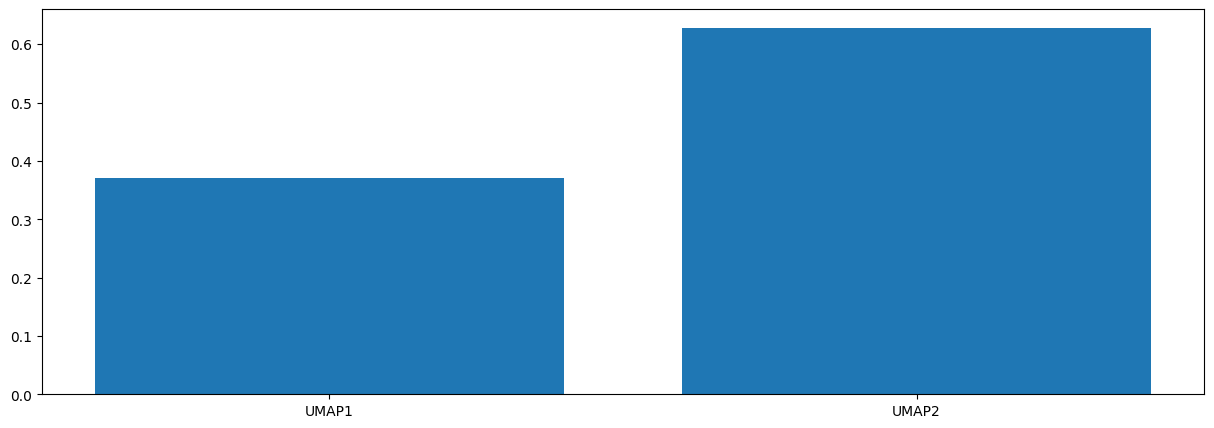

In [11]:
#Visualize feature importance

plt.figure(figsize=(15,5))
plt.bar(key,clf.feature_importances_)

In [12]:
y_pred = clf.predict(x_test)
sortedlabels = clf.classes_

Classification report and confusion matrix

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(cm)

              precision    recall  f1-score   support

      GALAXY       0.72      0.95      0.82     17834
         QSO       0.62      0.58      0.60      5688
        STAR       0.53      0.10      0.17      6478

    accuracy                           0.70     30000
   macro avg       0.62      0.54      0.53     30000
weighted avg       0.66      0.70      0.64     30000

[[16904   839    91]
 [ 1886  3293   509]
 [ 4599  1209   670]]


Visualization of Confusion Matrix

Text(43.25, 0.5, 'True')

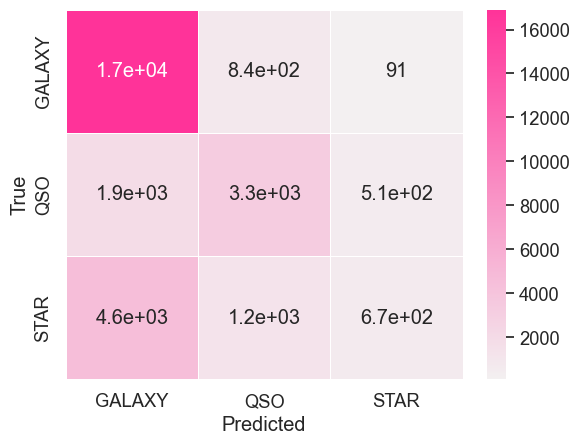

In [14]:
cm = pd.DataFrame(cm, index=sortedlabels, columns=sortedlabels)
sns.set(font_scale=1.2)
sns.heatmap(cm, linewidths=0.5, cmap=sns.light_palette((1, 0.2, 0.6),n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')